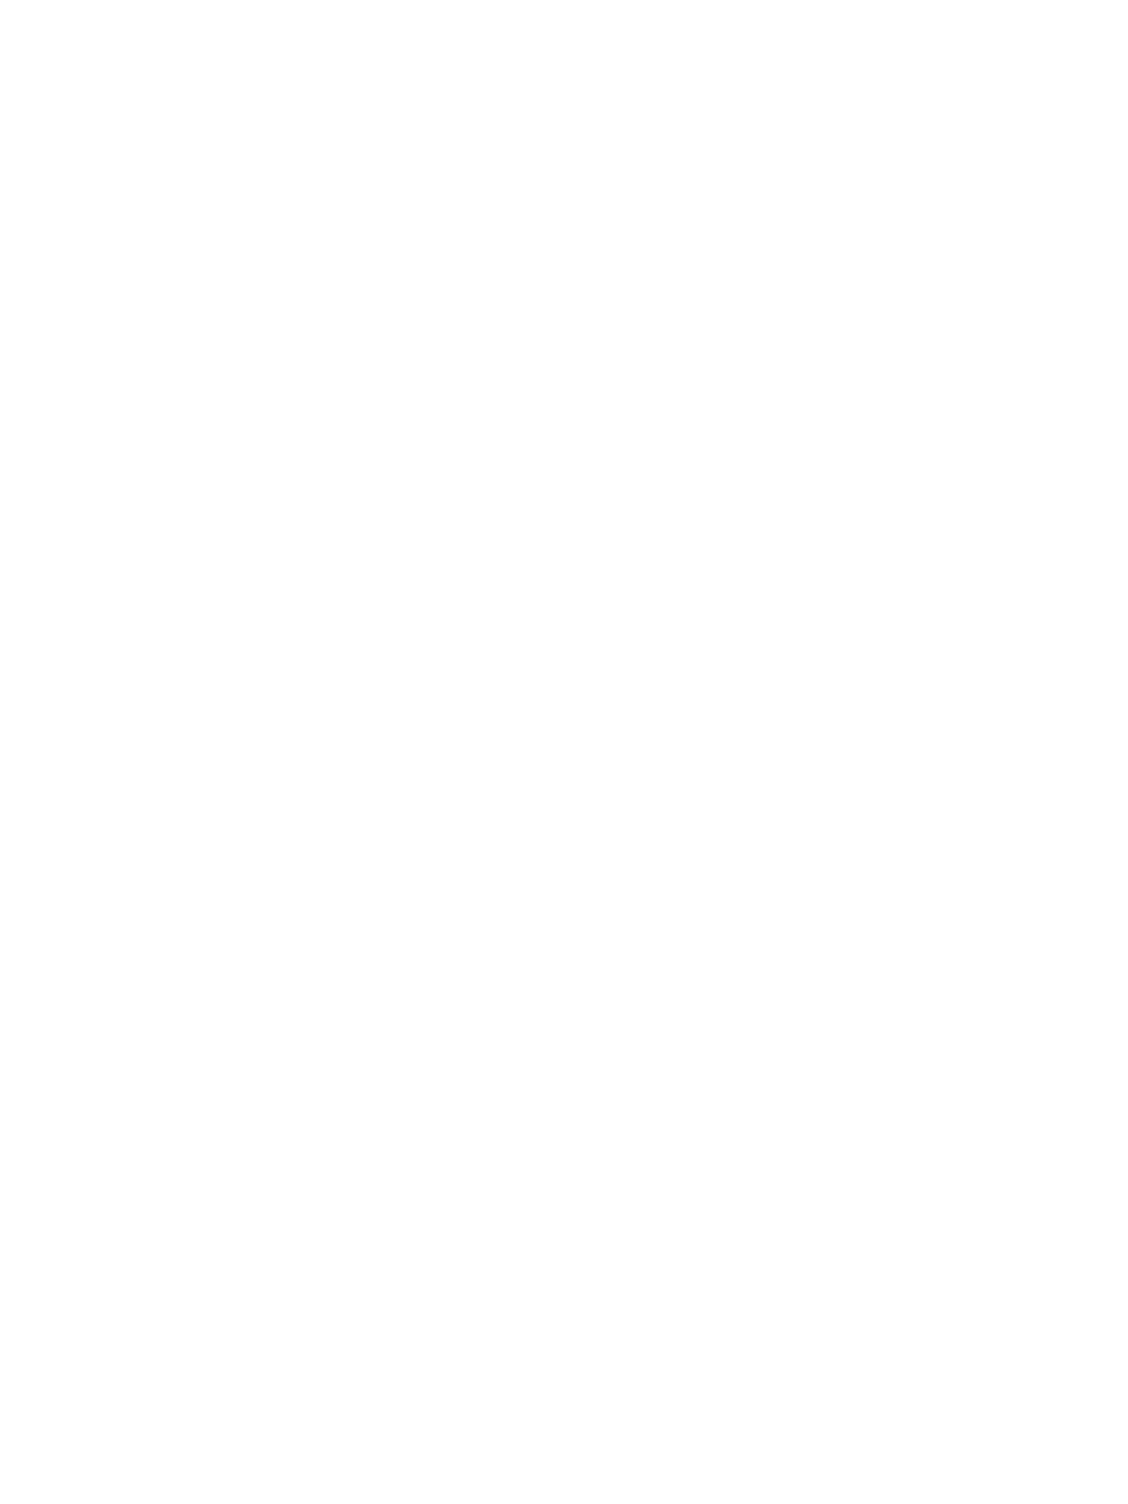

In [54]:
import drawsvg as draw
import json

d = draw.Drawing(300, 400)
def paginate(max_x,max_y, data):
    x = 0
    y = 0
    i = 0
    while y < max_y:
        while  i < len(data["ozone"]["scaledMeasurements"]) and x < max_x - data["ozone"]["scaledMeasurements"][i] - data["pm10"]["scaledMeasurements"][i] - 5:
            
            reg = data["region"]
            oz = data["ozone"]["scaledMeasurements"][i]
            pm = data["pm10"]["scaledMeasurements"][i]
            x += drawcloud(x,y,oz,pm, 5,20,reg,str(i))
            i+=1
        x = 0
        y += height
def drawcloud1(x,y, width, height, district='XX', time= 'NN', date=''):


    p = draw.Path(stroke_width=0.1, stroke='black', fill='black', fill_opacity=0.0)
   
    p.M(x-width,y)
    p.l(width,0)
    p.M(x,y)
    p.a(val1,height/2,0,0,1,x,y+height)
    p.M(x,y+height)
    p.l(-width,0)
   
    # p.M(x-width,y)
    # p.l(width,0)
    # p.M(x+val1,y+height/3)
    # p.c(cx1=-10,cy1=0,cx2=-10,cy2=-height/3,ex=-val1,ey=-height/3)
    # p.M(x+val1,y+height/3)
    # p.a(height/6,height/6,0,0,1,0,height/3)
    # p.M(x+val1,y+2*height/3)
    # p.c(cx1=-10,cy1=0,cx2=-10,cy2=height/3,ex=-val1,ey=height/3)
    # p.M(x,y+height)
    # p.l(-width,0)

    p.M(x,y)
    p.l(-width,0)


    p.M(x-width,y)
    p.l(-val2,height/2)
    p.M(x-val2-width,y+height/2)
    p.l(+val2,height/2)
    p.M(x+(width-cutin)/2,y)

    # p.M(x-val2-width,y+height/3)
    # p.c(cx1=10,cy1=0,cx2=10,cy2=-height/3,ex=val2,ey=-height/3)
    # p.M(x-val2-width,y+height/3)    
    # p.a(height/6,height/6,0,0,0,0,height/3)
    # p.M(x-val2-width,y+2*height/3)
    # p.c(cx1=10,cy1=0,cx2=10,cy2=height/3,ex=val2,ey=height/3)
    # p.M(x+(width-cutin)/2,y)

    d.append(p)

    d.append(draw.Text(district, 4,x - width,  y + height - 6, fill='blue'))
    d.append(draw.Text(time, 4,x - width,  y + height -1 , fill='blue'))

    r = draw.Rectangle(x-width/2-cutin/2,y,cutin,9.5, stroke='black', stroke_width=0.1, fill_opacity=0)
    d.append(r)
    return val1+val2+width


def drawcloud(x,y,val1,val2, width, height, district='XX', time= 'NN', date=''):
    x = x+val2+width

    p = draw.Path(stroke_width=0.1, stroke='black', fill='black', fill_opacity=0.0)
   
    p.M(x-width,y)
    p.l(width,0)
    p.M(x,y)
    p.a(val1,height/2,0,0,1,0,height)
    p.M(x,y+height)
    p.l(-width,0)
   
    # p.M(x-width,y)
    # p.l(width,0)
    # p.M(x+val1,y+height/3)
    # p.c(cx1=-10,cy1=0,cx2=-10,cy2=-height/3,ex=-val1,ey=-height/3)
    # p.M(x+val1,y+height/3)
    # p.a(height/6,height/6,0,0,1,0,height/3)
    # p.M(x+val1,y+2*height/3)
    # p.c(cx1=-10,cy1=0,cx2=-10,cy2=height/3,ex=-val1,ey=height/3)
    # p.M(x,y+height)
    # p.l(-width,0)

    p.M(x,y)
    p.l(-width,0)


    p.M(x-width,y)
    p.l(-val2,height/2)
    p.M(x-val2-width,y+height/2)
    p.l(+val2,height/2)
    p.M(x+(width-cutin)/2,y)

    # p.M(x-val2-width,y+height/3)
    # p.c(cx1=10,cy1=0,cx2=10,cy2=-height/3,ex=val2,ey=-height/3)
    # p.M(x-val2-width,y+height/3)    
    # p.a(height/6,height/6,0,0,0,0,height/3)
    # p.M(x-val2-width,y+2*height/3)
    # p.c(cx1=10,cy1=0,cx2=10,cy2=height/3,ex=val2,ey=height/3)
    # p.M(x+(width-cutin)/2,y)

    d.append(p)

    d.append(draw.Text(district, 4,x - width,  y + height - 6, fill='blue'))
    d.append(draw.Text(time, 4,x - width,  y + height -1 , fill='blue'))

    r = draw.Rectangle(x-width/2-cutin/2,y,cutin,9.5, stroke='black', stroke_width=0.1, fill_opacity=0)
    d.append(r)
    return val1+val2+width

val1 = 10
val2 = 10
width = 5
height = 20
cutin = 2

with open("smoke.json", "r") as read_file:
    data = json.load(read_file)
# print(data[0]["region"])
# print(data[0]["ozone"]["measurements"][0])
# print(data[0]["pm10"]["measurements"][0])
for i in range(0,len(data)):
    paginate(300,400,data[i])
    d.set_pixel_scale(3.760635547407512)  # Set number of pixels per geometry unit
    #d.set_render_size(400, 200)  # Alternative to set_pixel_scale
    d.save_svg(data[i]["region"]+'.svg')
    
    d = draw.Drawing(300, 400)
# drawcloud(0,0,0,0, width, height, "D1", '00')
# drawcloud(5,5,5,5, 5, 20, "D1", '00')
# drawcloud(0,0,10,10, width, height, "D1", '00')

# drawcloud(0,0,15,15, width, height, "D1", '00')

# drawcloud(0,0,15,18, width, height, "D1", '00')

# drawcloud(0,0,20,20, width, height, "D1", '00')
# drawcloud(30,15,16,15, width, height, "D1", '01')
# drawcloud(-30,15,18,20, width, height, "D1", '02')


d.set_pixel_scale(3.760635547407512)  # Set number of pixels per geometry unit
#d.set_render_size(400, 200)  # Alternative to set_pixel_scale
d.save_svg('example.svg')
# d.save_png('example.png')

# Display in Jupyter notebook
#d.rasterize()  # Display as PNG
d  # Display as SVG